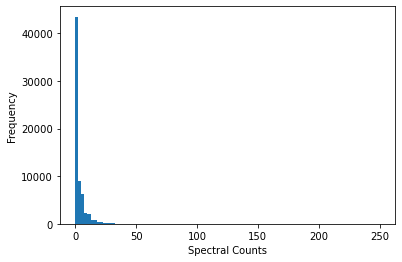

In [1]:
import graph_tool as gt

from graph_tool.all import graph_draw

import inspect
from itertools import combinations
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path, PosixPath

import pandas as pd
import scipy
#User
import pynetio as mio
from myitertools import exhaust, forp
import predicates as pred
from utils import doc, ls, psrc



home = Path.home()

if Path(".").absolute() == PosixPath('/home/aji/Projects/dev/pynet/pyext'):
    src = Path(".")
else:
    src = home / 'Projects/dev/pynet'
data = src / 'data'
lip = data / 'sars-cov-2-LiP'
multi = data / 'multi-proteomics'
apms_stuk = multi / '41586_2021_3493_MOESM6_ESM.xlsx'
apms_stuk_sheetname = 'A - Significant interactions'
apms_gordon = data / 'sars-cov-2-ppi/41586_2020_2286_MOESM5_ESM.xlsx'

#Variables for testing lip funcitons

xls_paths = list(mio.gen_excelpaths_from_dir(lip))
lip1 = xls_paths[1]

lipgen = mio.parse_lip_xls_file(lip1)

apms = pd.read_excel(apms_gordon)

def spec_counts_str_col_to_array(sc):
    def sc_row_to_list(scrow):
        mylist = []
        for i in scrow.split('|'):
            mylist.append(int(i))
        return mylist
    row_list = []
    for row in sc:
        row_list.append(sc_row_to_list(row))
    return np.array(row_list, dtype=np.uint8)
apms[['scr1', 'scr2', 'scr3']]=spec_counts_str_col_to_array(apms['Spec'])
    


#The histogram of spectral counts
plt.hist(np.ravel(list(apms[i].values for i in ['scr1', 'scr2', 'scr3'])), bins=100)
plt.xlabel('Spectral Counts')
plt.ylabel("Frequency")
plt.show()

In [2]:
"""
Undirected graphs
G = {V, E}
|V| = len(V) = n : the number of vertices in the graph
|E| = len(E) : the number of edges in the graph
K_n : the complete graph with n vertices where |E| = int(0.5(n(n-1)))

Ordering of vertices [0, len(V))
ordered_edge (v1, v2)
Where 0 <= v1 < v2 <= |V| - 1

Ordering of graphs of size n [0, 2**|K_n|)
  - Order by the number of edges in the graph from 0 to |K_n|
  - Order by the edge sequence
     - Fill in the minimal energy edges until |E| is reached

Define next and previous operations for each of these objects
"""
def next_vertex(i):
    return i + 1
def prev_vertex(i):
    return i - 1

def next_edge(e, vertex_n_max):
    """
    Return the next edge in the sequence
    """
    if e[1] < vertex_n_max - 1: return (e[0], e[1]+1)
    else: return (e[0] + 1, e[0] + 2)
    
def prev_edge(e, vmax):
    #if e > first_e:
    # (0, 2) -> (0, 1)
    if e[1] > e[0] + 1: return (e[0], e[1] - 1)
    # (1, 2) -> (0, 3)
    else: return (e[0] - 1, vmax - 1)
    
def next_graph_of_size_E(ordered_elist, vertex_n_max):
    change_index = -1
    proposed_e = next_edge(ordered_elist[change_index])

    
def generate_eseq(estart, vertex_n_max):
    yield estart
    while estart != (vertex_n_max - 2, vertex_n_max - 1):
        next_e = next_edge(estart, vertex_n_max)
        estart = next_e
        yield estart

def generate_pair_gen(estart, vmax):
    elist = list(generate_eseq(estart, vmax))
    while len(elist) > 0:
        e1 = elist.pop(0)
        for i in elist:
            yield [e1, i]

def generate_ordered_graphs(enum, estart, vmax):
    """
    Generate graphs in order with a given number of edges and vertices
    """
    combinations = scipy.special.comb((vmax-1)*(vmax -2) //2, enum, exact = True)
    i=0
    while i < combinations:
        
        
        i+=1
    
    
    possible_ordered_edges = list(generate_eseq((0, 1), vmax))
    estart_index = possible_ordered_edges.index(estart)
    g1 = possible_ordered_edges[estart_index:estart_index + enum]
    
    #Freeze the first two, enumerate the last



    
    print(g1)

    
def next_graph(current_elist, vmax):
    enum = len(elist)
    proposed_edge = next_edge(current_elist[-1])
    if proposed_edge[1] < vmax:
        pass
        
    
        
def enumerate_graphs(enum, vmax):
    """
    Enumerate graphs of enum edges have vmax vertices
    Defined for graphs with at least 3 vertices
    """
    e1 = (0, 1)
    pass
    

def undireceted_graph_enumerator(g):
    """
    For a graph of size n, enunmerate all graphs in order
    vertex identifiers [0, n)
    edge identifiers [0, 0.5n(n-1))
    """
    vertex_index_max = max(g.vertex_index)
    vertex_n_max = vertex_index_max + 1 #The number of vertices
    edge_n_max = vertex_n_max*(vertex_n_max - 1) // 2
    for edgenum in range(edge_n_max + 1): #Add 1 to make the range inclusive
        edgenum_combinations = scipy.special.comb(edge_n_max, edgenum, exact=True)
        print(edgenum_combinations)

g = gt.Graph()
for i in range(4):
    g.add_vertex()
#Define the graph prior


#Define the APMS likelihood


#Define the 



def test_next_prev(vmax):
    print("fEdges for vmax = {vmax}")
    print(' e      next   prev   pne    npe   b')
    for e in generate_eseq((0, 1), vmax):
        ne = next_edge(e, vmax)
        pe = prev_edge(e, vmax)
        pne = prev_edge(ne, vmax)
        npe = next_edge(pe, vmax)
        b = e == npe
        
        print(e, ne, pe, pne, npe, b)

test_next_prev(4)

fEdges for vmax = {vmax}
 e      next   prev   pne    npe   b
(0, 1) (0, 2) (-1, 3) (0, 1) (0, 1) True
(0, 2) (0, 3) (0, 1) (0, 2) (0, 2) True
(0, 3) (1, 2) (0, 2) (0, 3) (0, 3) True
(1, 2) (1, 3) (0, 3) (1, 2) (1, 2) True
(1, 3) (2, 3) (1, 2) (1, 3) (1, 3) True
(2, 3) (3, 4) (1, 3) (2, 3) (2, 3) True


In [3]:
"""
Undirected graphs
G = {V, E}
|V| = len(V) = n : the number of vertices in the graph
|E| = len(E) : the number of edges in the graph
K_n : the complete graph with n vertices where |E| = int(0.5(n(n-1)))

Ordering of vertices [0, len(V))
ordered_edge (v1, v2)
Where 0 <= v1 < v2 <= |V| - 1

Ordering of graphs of size n [0, 2**|K_n|)
  - Order by the number of edges in the graph from 0 to |K_n|
  - Order by the edge sequence
     - Fill in the minimal energy edges until |E| is reached

Define next and previous operations for each of these objects
"""

def next_n_graph(ord_elist, vmax):
    #print('next_n_graph')
    ord_elist = ord_elist.copy()
    ne = len(ord_elist)
    all_edges = list(generate_eseq((0, 1), vmax))
    ne_Kn = len(all_edges)
    idx = -1
    emax = (vmax-2, vmax-1)
    for idx in range(-1, -len(ord_elist) -1, -1):
        #print(f'{idx}\t{all_edges}')
        current_e = ord_elist[idx]
        abs_ord = all_edges.index(current_e) #[0, |E|)
        
        n_edges_remaining = -idx
        
        #The window to change
        s1 = slice(idx, ne)
        
        #The view to change to
        s2 = slice(abs_ord+1, abs_ord +1 + n_edges_remaining)
        
        

        if current_e < emax and (len(ord_elist[s1]) <= len(all_edges[s2])):

            #print('current_e  abs_ord n_edges_to_change n_edges_remain ')
            #print(f'{current_e}   \t{abs_ord} \t\t{n_edges_remaining}')

            #Select a window from [estart, 

            #print(f'{s1}\t{s2}\t{ord_elist[s1]}\t{all_edges[s2]}')
            ord_elist[s1]=all_edges[s2]
            return ord_elist
    

In [4]:
"""
gid indexes into the sequence of ordered undirected graphs
mantissa indexes into the sequence of ordered subgraphs
with ne edges
"""

def femax(vmax):
    """
    Returns the maximum number of edges in the undirected graph
    """
    return vmax*(vmax - 1) // 2
def edge_combs(emax):
    """
    Returns an edge combination generator
    The value is the number of combinations
    The index is the number of edges
    
    e.g., index 0 1 2 3
          value 1 3 3 1
    
    
    """
    return (int(scipy.special.comb(emax, i)) for i in range(emax+1))
            
def ne(gid, vmax):
    """
    Returns the number of edges for a given gid & vmax
    """
    emax = femax(vmax)
    
    #The index of combs is the edge number
    combs = list(edge_combs(emax))
    assert sum(combs) == 2**emax
    
    solutions = 0
    edges = 0
    while gid >= solutions:
        solutions += combs[edges]
        edges +=1
    return edges - 1

def base(nedges, vmax):
    """
    returns the base for nedges and vmax
    The graph id (gid) = base + mantissa
    """
    emax = femax(vmax)
    combs = list(edge_combs(emax))
    return sum(combs[0:nedges])

def mantissa(gid, vmax):
    """
    returns the mantissa for gid, vmax
    gid = base + mantissa
    """
    b = base(ne(gid, vmax), vmax)
    return gid - b

def next_vertex(i):
    """
    Count the next vertex, undefined over vmax
    """
    return i + 1

def prev_vertex(i):
    """
    Count the previous vertex, undefined for i < 1
    """
    return i - 1

def next_edge(e, vertex_n_max):
    """
    Return the next edge in the sequence
    """
    if e[1] < vertex_n_max - 1: return (e[0], e[1]+1)
    else: return (e[0] + 1, e[0] + 2)
    
def prev_edge(e, vmax):
    #if e > first_e:
    # (0, 2) -> (0, 1)
    if e[1] > e[0] + 1: return (e[0], e[1] - 1)
    # (1, 2) -> (0, 3)
    else: return (e[0] - 1, vmax - 1)

    

def permutations(nitems):
    perms = []
    for i in range(nitems):
        for j in range(i+1, nitems):
            perms.append((i, j))
    return perms


def generate_graph(gid, vmax):
    """
    Return an ordered elist from a graph id and n vertices
    """
    nedges = ne(gid, vmax)
    b = base(nedges, vmax)
    m = mantissa(gid, vmax)
    
    if gid == 0:
        return []
    else:
        all_edges = list(generate_eseq((0, 1), vmax))
        combinations_iter = combinations(range(len(all_edges)), nedges)
        
        for i, combo in enumerate(combinations_iter):
            #print(i, combo)
            if i == m:
                eseq = []
                #print(combo)
                for idx in combo:
                    eseq.append(all_edges[idx])
                return eseq
    

In [5]:




vmax = 5
emax = femax(vmax)
solutions = 2**emax
print(f'solutions {solutions}')
print('gid >= base')
print('gid = base + mantissa')
y = list(edge_combs(emax))
print(y)
print('gid ne base mantissa  graph')

for i in range(2**emax):
    nedges = ne(i, vmax)
    g = generate_graph(i, vmax)
    print(f'{i}   {ne(i, vmax)}   {base(nedges, vmax)}\t{mantissa(i, vmax)}  {g}')

solutions 1024
gid >= base
gid = base + mantissa
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
gid ne base mantissa  graph
0   0   0	0  []
1   1   1	0  [(0, 1)]
2   1   1	1  [(0, 2)]
3   1   1	2  [(0, 3)]
4   1   1	3  [(0, 4)]
5   1   1	4  [(1, 2)]
6   1   1	5  [(1, 3)]
7   1   1	6  [(1, 4)]
8   1   1	7  [(2, 3)]
9   1   1	8  [(2, 4)]
10   1   1	9  [(3, 4)]
11   2   11	0  [(0, 1), (0, 2)]
12   2   11	1  [(0, 1), (0, 3)]
13   2   11	2  [(0, 1), (0, 4)]
14   2   11	3  [(0, 1), (1, 2)]
15   2   11	4  [(0, 1), (1, 3)]
16   2   11	5  [(0, 1), (1, 4)]
17   2   11	6  [(0, 1), (2, 3)]
18   2   11	7  [(0, 1), (2, 4)]
19   2   11	8  [(0, 1), (3, 4)]
20   2   11	9  [(0, 2), (0, 3)]
21   2   11	10  [(0, 2), (0, 4)]
22   2   11	11  [(0, 2), (1, 2)]
23   2   11	12  [(0, 2), (1, 3)]
24   2   11	13  [(0, 2), (1, 4)]
25   2   11	14  [(0, 2), (2, 3)]
26   2   11	15  [(0, 2), (2, 4)]
27   2   11	16  [(0, 2), (3, 4)]
28   2   11	17  [(0, 3), (0, 4)]
29   2   11	18  [(0, 3), (1, 2)]
30   2   11	19  [(0, 

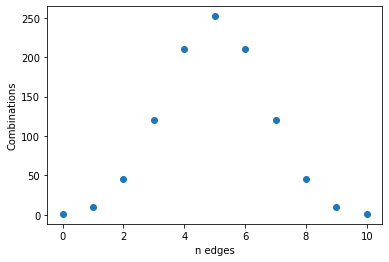

In [195]:
plt.scatter(range(len(y)), y)
plt.xlabel('n edges')
plt.ylabel('Combinations')
plt.show()

In [5]:
t1 = [(0, 1)]
t2 = [(0, 2)]
t3 = [(1, 2)]
t4 = [(0, 1), (0, 2)]
t5 = [(0, 1), (1, 2)]
t6 = [(0, 1), (0, 2), (1, 2)]

#
t3_4 = [(0, 3)]


master = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


tests = {3:[t1, t2, t3, t4, t5, t6],
         4:[[(0, 1)], #4 1 6 1 : 1 : master[gid-1]
            [(0, 2)], #4 1 6 2 : 2
            [(0, 3)], #4 1 6 3 : 3
            [(1, 2)], #4 1 6 4 : 4
            [(1, 3)], #4 1 6 5 : 5
            [(2, 3)], #4 1 6 6 : 6
            [(0, 1), (0, 2)], #4 2 5 1 : 7 master[0:gid] = master[]
            [(0, 1), (0, 3)], #4 2 5 2 : 8
            [(0, 1), (1, 2)], #4 2 5 3 : 9
            [(0, 1), (1, 3)], #4 2 5 4 : 10
            [(0, 1), (2, 3)], #4 2 5 5 : 11
            [(0, 2), (0, 3)], #4 2 4 1 : 12 master[1:gid]
            [(0, 2), (1, 2)], #
            [(0, 2), (1, 3)],
            [(0, 2), (2, 3)],
            [(0, 3), (1, 2)],
            [(0, 3), (1, 3)],
            [(0, 3), (2, 3)],
            [(1, 2), (1, 3)],
            [(1, 2), (2, 3)],
            [(1, 3), (2, 3)],
            [(0, 1), (0, 2), (0, 3)],
            [(0, 1), (0, 2), (1, 2)],
            [(0, 1), (0, 2), (1, 3)],
            [(0, 1), (0, 2), (2, 3)],
            [(0, 1), (0, 3), (1, 2)],
            [(0, 1), (0, 3), (1, 3)],
            [(0, 1), (0, 3), (2, 3)]
            [(0, 1), (0, 2), (0, 3), (1, 2)]
           ]}


# 4 choose 2
# 1, 2 | 1, 3 | 1

for key, item in tests.items():
    print('\n')
    for i, test in enumerate(item):
        result = next_n_graph(test, key)
        try:
            compare = result == item[i+1]
        except IndexError:
            compare = "IndexError"
        print(f'key:{key} test:{test} return: {result} compare: {compare}')

<>:43: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:43: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/tmp/ipykernel_134591/516857291.py:43: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [(0, 1), (0, 3), (2, 3)]


TypeError: list indices must be integers or slices, not tuple

In [ ]:
def gid(n, ne, )

0 3 [[(0, 1)], [(0, 2)], [(1, 2)], [(0, 1), (0, 2)], [(0, 1), (1, 2)], [(0, 1), (0, 2), (1, 2)]]
1 4 [[(0, 1)], [(0, 2)], [(0, 3)], [(1, 2)], [(1, 3)], [(2, 3)], [(0, 1), (0, 2)], [(0, 1), (0, 3)], [(0, 2), (0, 3)], [(1, 2), (1, 3)], [(0, 1), (0, 2), (0, 3)], [(0, 1), (0, 2), (1, 2)], [(0, 1), (0, 2), (1, 3)], [(0, 1), (1, 2), (1, 3)], [(0, 1), (0, 2), (0, 3), (1, 2)]]


In [189]:
for key, item in tests.items():
    print(key, item)

3 [[(0, 1), (1, 3)], [(0, 3)], [(1, 3)], [(0, 1), (1, 3)]]
4 [[(0, 1), (1, 3)], [(0, 3)], [(1, 3)], [(0, 1), (1, 3)]]


In [22]:
list(generate_eseq((0, 1), 3))

[(0, 1), (0, 2), (1, 2)]

In [78]:
absolute_ordering:absolute_ordering + n_edges_to_changedef next_elist(ordered_elist, vmax, debug=False):
    
    e_max = (vmax -2, vmax -1)
    
    #Generate a sequence of edges
    change_index = -1
    while True:
        print(change_index)
        current_edge = ordered_elist[change_index]
        ne = next_edge(current_edge, vmax)
        
        
        #Accept and change_index == -len(array)
        
        #Accept and change_index = -1
        if (ne <= e_max) and (change_index== -1):
            ordered_elist[change_index] = ne
            return ordered_elist
        #Accept and -len(array) <= change_index < -1
        elif (ne >= e_max) and (change_index < -1):
            nelist = list(generate_eseq(current_edge, vmax))
            ordered_elist[change_index:-1] = nelist
            return ordered_elist
        change_index-=1
        

In [100]:
def find_change_index(elist, vmax):
    idx = -1
    emax = (vmax - 2, vmax -1)
    case = [lambda idx: idx == -1,
            lambda idx: idx < -1,
            lambda idx, elist: idx == len(elist),
            lambda e, emax: e == emax,
            lambda e, emax: e < emax,
            lambda e, emax: e > emax
            ]
    
    while change_index > -len(elist):
        # -len(elist) < idx <= -1
        if elist[change_index] < emax:
            return change_index
        
        elif elist[change_index]:
            change_index -=1

#[e1, e2, e3]
# e1 < e2 < e3
# emax
# ereject


In [47]:
# (0, 1) ne
# (0, 2) ne
# (1, 2)

# (0, 1), (0, 2) ne
# (0, 1), (1, 2) ne
# (0, 2), (1, 2)

# (0, 1), (0, 2), (1, 2)


# (0, 1)
# (0, 2)
# (0, 3)
# (1, 2)
# (1, 3)
# (2, 3)

# (0, 1), (0, 2)
# (0, 1), (0, 3)
# (0, 1), (1, 2)
# (0, 1), (1, 3)
# (0, 1), (2, 3)

# (0, 2), (0, 3)
# (0, 2), (1, 2) ...


# (0, 1), (0, 2), (0, 3)
# (0, 1), (0, 2), (1, 2)
# (0, 1), (0, 2), (1, 3)
# (0, 1), (0, 2), (2, 3)

# (0, 1), (0, 3), (1, 2)
# (0, 1), (0, 3), (1, 3)
# (0, 1), (0, 3), (2, 3)

# (0, 1), (1, 2), (1, 3)
# (0, 1), (1, 2), (2, 3)
# (0, 1), (1, 3), (2, 3)

# (0, 1), (2,3), (3, 4) #reject


In [93]:
#Introduce Integrative Network Modeling
#Motivate the problem, emphasis on generalizability

#Illustration with APMS data likelihood and prior

#Prior based on graph density -> Benchmark on Corum

#Likelihood based on the covariation of abundances in APMS data

#Comparison to know complexes in Corum

#Prior predictive check

#Next steps

[1, 2]